<a href="https://colab.research.google.com/github/codekid211/air_quality_prediction/blob/main/Air_Quality_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
df=pd.read_csv('/content/data.csv',encoding='unicode_escape')
df.head()
df.info()
df.isnull().sum()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435742 entries, 0 to 435741
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     291665 non-null  object 
 1   sampling_date                435739 non-null  object 
 2   state                        435742 non-null  object 
 3   location                     435739 non-null  object 
 4   agency                       286261 non-null  object 
 5   type                         430349 non-null  object 
 6   so2                          401096 non-null  float64
 7   no2                          419509 non-null  float64
 8   rspm                         395520 non-null  float64
 9   spm                          198355 non-null  float64
 10  location_monitoring_station  408251 non-null  object 
 11  pm2_5                        9314 non-null    float64
 12  date                         435735 non-null  object 
dtyp

Index(['stn_code', 'sampling_date', 'state', 'location', 'agency', 'type',
       'so2', 'no2', 'rspm', 'spm', 'location_monitoring_station', 'pm2_5',
       'date'],
      dtype='object')

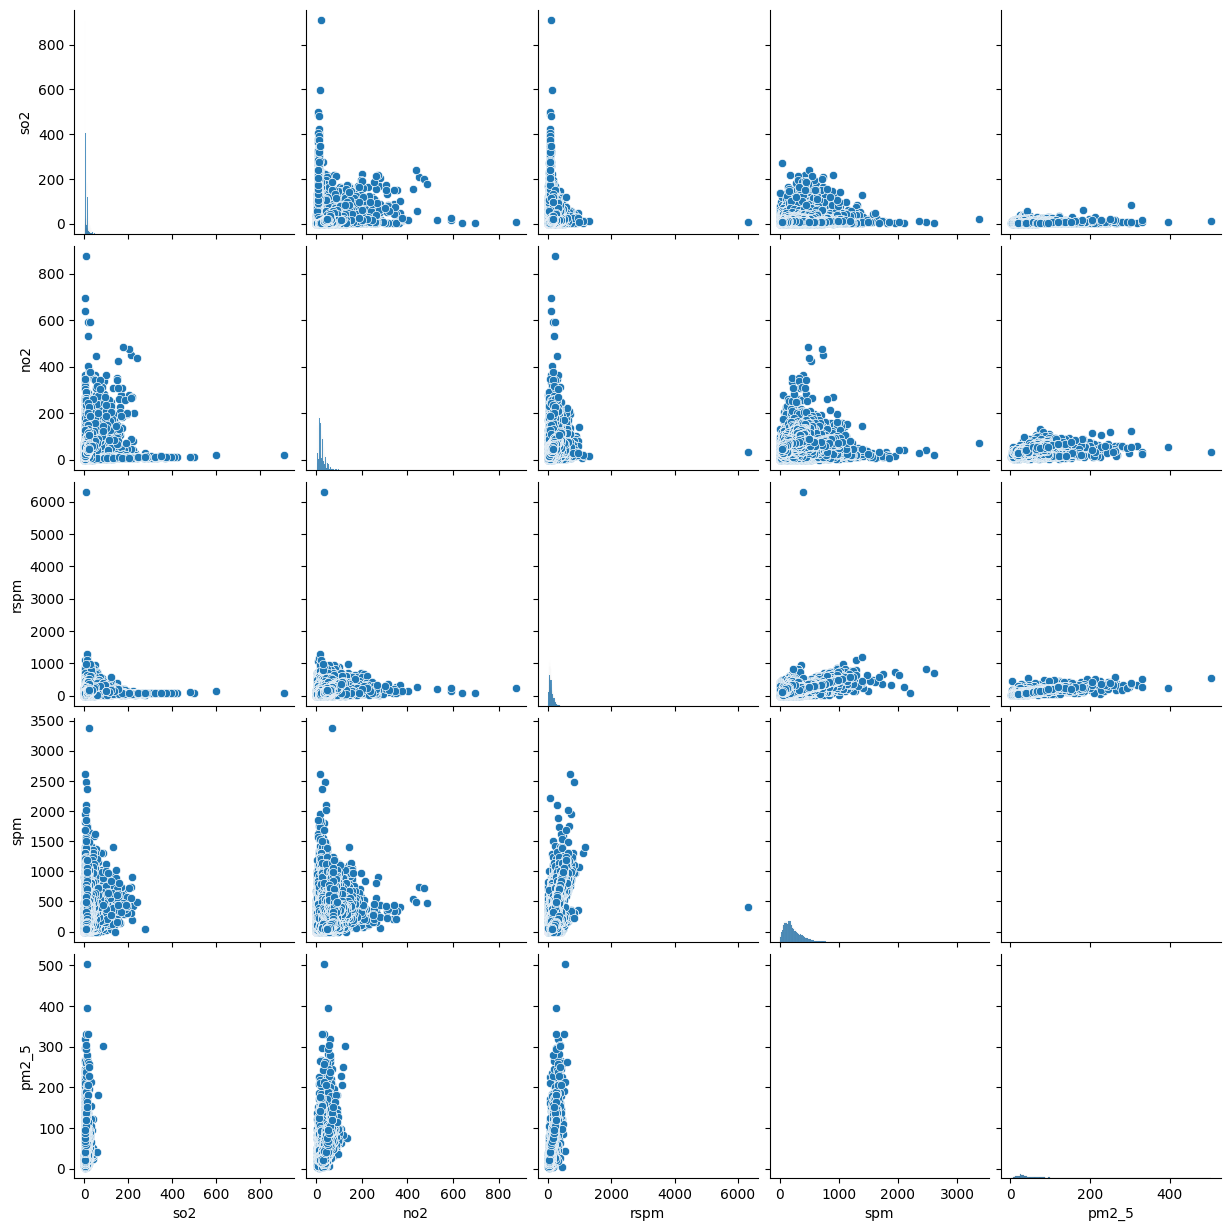

In [ ]:
sns.pairplot(data=df)

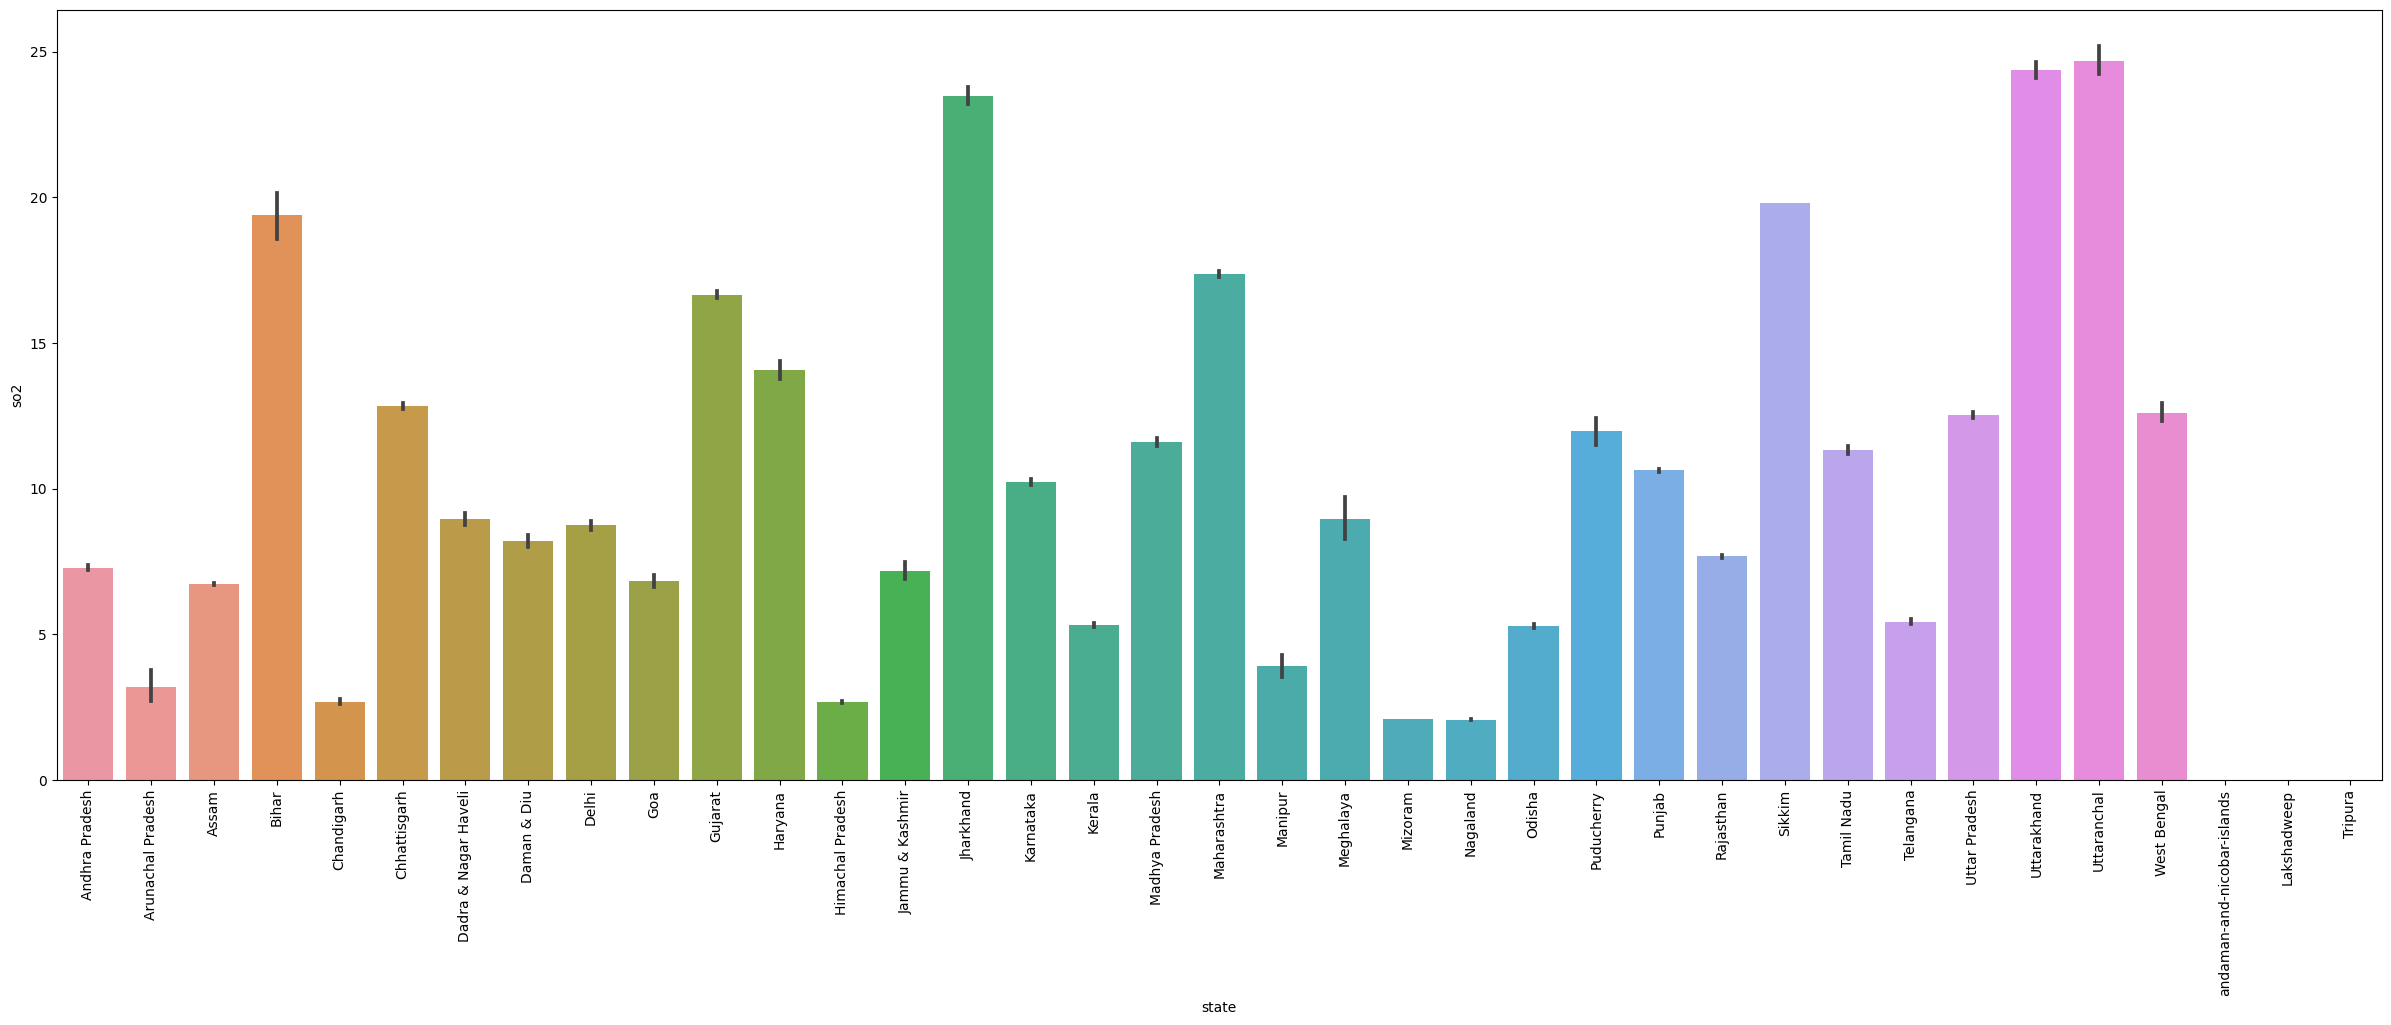

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='state',y='so2',data=df);

In [ ]:
df.drop(['agency'],axis=1,inplace=True)
df.drop(['stn_code'],axis=1,inplace=True)
df.drop(['date'],axis=1,inplace=True)
df.drop(['sampling_date'],axis=1,inplace=True)
df.drop(['location_monitoring_station'],axis=1,inplace=True)
df.drop(['location'],axis=1,inplace=True)
df.drop(['type'],axis=1,inplace=True)

In [ ]:
df.isnull().sum()

state         0
so2       34646
no2       16233
rspm      40222
spm      237387
pm2_5    426428
dtype: int64

In [ ]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [ ]:
df.isnull().sum()

state    0
so2      0
no2      0
rspm     0
spm      0
pm2_5    0
dtype: int64

In [ ]:
def cal_SOi(so2):
    si=0
    if (so2<=40):
     si= so2*(50/40)
    elif (so2>40 and so2<=80):
     si= 50+(so2-40)*(50/40)
    elif (so2>80 and so2<=380):
     si= 100+(so2-80)*(100/300)
    elif (so2>380 and so2<=800):
     si= 200+(so2-380)*(100/420)
    elif (so2>800 and so2<=1600):
     si= 300+(so2-800)*(100/800)
    elif (so2>1600):
     si= 400+(so2-1600)*(100/800)
    return si
df['SOi']=df['so2'].apply(cal_SOi)
data= df[['so2','SOi']]
data.head()

,so2,SOi
0,4.8,6.000
1,3.1,3.875
2,6.2,7.750
3,6.3,7.875
4,4.7,5.875


In [ ]:
def cal_Noi(no2):
    ni=0
    if(no2<=40):
     ni= no2*50/40
    elif(no2>40 and no2<=80):
     ni= 50+(no2-40)*(50/40)
    elif(no2>80 and no2<=180):
     ni= 100+(no2-80)*(100/100)
    elif(no2>180 and no2<=280):
     ni= 200+(no2-180)*(100/100)
    elif(no2>280 and no2<=400):
     ni= 300+(no2-280)*(100/120)
    else:
     ni= 400+(no2-400)*(100/120)
    return ni
df['Noi']=df['no2'].apply(cal_Noi)
data= df[['no2','Noi']]
data.head()

,no2,Noi
0,17.4,21.750
1,7.0,8.750
2,28.5,35.625
3,14.7,18.375
4,7.5,9.375


In [ ]:
def cal_RSPMI(rspm):
    rpi=0
    if(rpi<=30):
     rpi=rpi*50/30
    elif(rpi>30 and rpi<=60):
     rpi=50+(rpi-30)*50/30
    elif(rpi>60 and rpi<=90):
     rpi=100+(rpi-60)*100/30
    elif(rpi>90 and rpi<=120):
     rpi=200+(rpi-90)*100/30
    elif(rpi>120 and rpi<=250):
     rpi=300+(rpi-120)*(100/130)
    else:
     rpi=400+(rpi-250)*(100/130)
    return rpi
df['Rpi']=df['rspm'].apply(cal_RSPMI)
data= df[['rspm','Rpi']]
data.head()

,rspm,Rpi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
def cal_SPMi(spm):
    spi=0
    if(spm<=50):
     spi=spm*50/50
    elif(spm>50 and spm<=100):
     spi=50+(spm-50)*(50/50)
    elif(spm>100 and spm<=250):
     spi= 100+(spm-100)*(100/150)
    elif(spm>250 and spm<=350):
     spi=200+(spm-250)*(100/100)
    elif(spm>350 and spm<=430):
     spi=300+(spm-350)*(100/80)
    else:
     spi=400+(spm-430)*(100/430)
    return spi

df['SPMi']=df['spm'].apply(cal_SPMi)
data= df[['spm','SPMi']]
data.head()

,spm,SPMi
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0


In [ ]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['state','SOi','Noi','Rpi','SPMi','AQI']]
data.head()

,state,SOi,Noi,Rpi,SPMi,AQI
0,Andhra Pradesh,6.000,21.750,0.0,0.0,21.750
1,Andhra Pradesh,3.875,8.750,0.0,0.0,8.750
2,Andhra Pradesh,7.750,35.625,0.0,0.0,35.625
3,Andhra Pradesh,7.875,18.375,0.0,0.0,18.375
4,Andhra Pradesh,5.875,9.375,0.0,0.0,9.375


In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()

,state,so2,no2,rspm,spm,pm2_5,SOi,Noi,Rpi,SPMi,AQI,AQI_Range
0,Andhra Pradesh,4.8,17.4,0.0,0.0,0.0,6.000,21.750,0.0,0.0,21.750,Good
1,Andhra Pradesh,3.1,7.0,0.0,0.0,0.0,3.875,8.750,0.0,0.0,8.750,Good
2,Andhra Pradesh,6.2,28.5,0.0,0.0,0.0,7.750,35.625,0.0,0.0,35.625,Good
3,Andhra Pradesh,6.3,14.7,0.0,0.0,0.0,7.875,18.375,0.0,0.0,18.375,Good
4,Andhra Pradesh,4.7,7.5,0.0,0.0,0.0,5.875,9.375,0.0,0.0,9.375,Good


In [ ]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()

,SOi,Noi,Rpi,SPMi
0,6.000,21.750,0.0,0.0
1,3.875,8.750,0.0,0.0
2,7.750,35.625,0.0,0.0
3,7.875,18.375,0.0,0.0
4,5.875,9.375,0.0,0.0


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)


#Linear Regression

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:

train_pred=model.predict(X_train)

test_pred=model.predict(X_test)

In [ ]:
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TestData = ",str(RMSE_test))

print('RSquared value on test:',model.score(X_test, Y_test))


RMSE TestData =  13.672937344789002
RSquared value on test: 0.9847286394495923


In [ ]:
test_pred

array([ 17.94360169,  33.54279862,  25.71719326, ..., 158.39604545,
       145.53120817, 254.65017187])

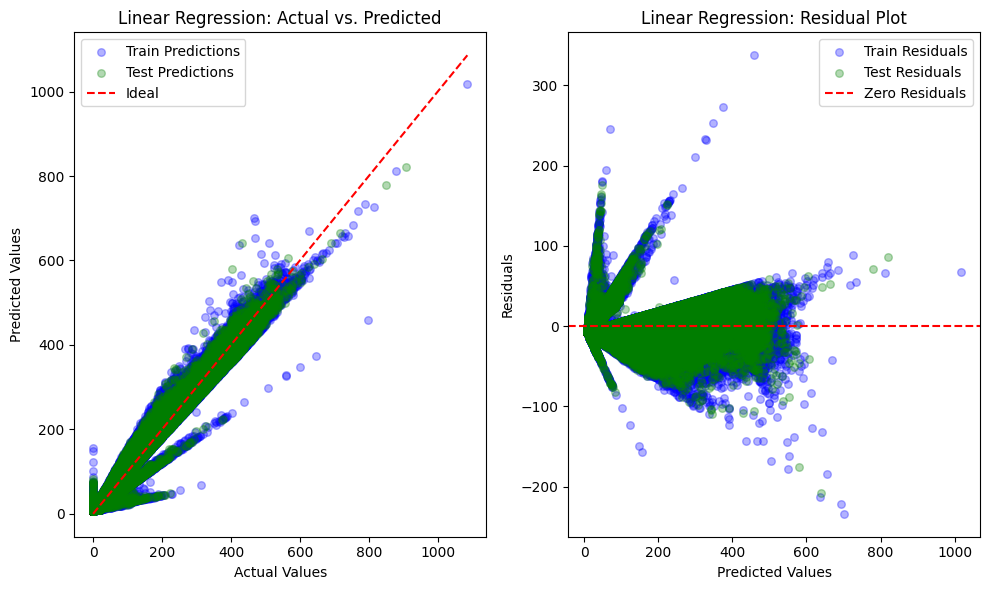

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
train_residuals = Y_train - train_pred
test_residuals = Y_test - test_pred
plt.scatter(Y_train, train_pred, color='blue', alpha=0.3, s=30)
plt.scatter(Y_test, test_pred, color='green', alpha=0.3, s=30)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression: Actual vs. Predicted')
plt.legend(['Train Predictions', 'Test Predictions', 'Ideal'])

plt.subplot(1, 2, 2)
plt.scatter(train_pred, train_residuals, color='blue', alpha=0.3, s=30)
plt.scatter(test_pred, test_residuals, color='green', alpha=0.3, s=30)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Linear Regression: Residual Plot')
plt.legend(['Train Residuals', 'Test Residuals','Zero Residuals'])

plt.tight_layout()
plt.show()


#Decision Tree

In [ ]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
train_preds=DT.predict(X_train)
test_preds=DT.predict(X_test)

In [ ]:
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))

print("RMSE TestData = ",str(RMSE_test))

print('RSquared value on test:',DT.score(X_test, Y_test))


RMSE TestData =  1.2978873912351059
RSquared value on test: 0.9998623969341923


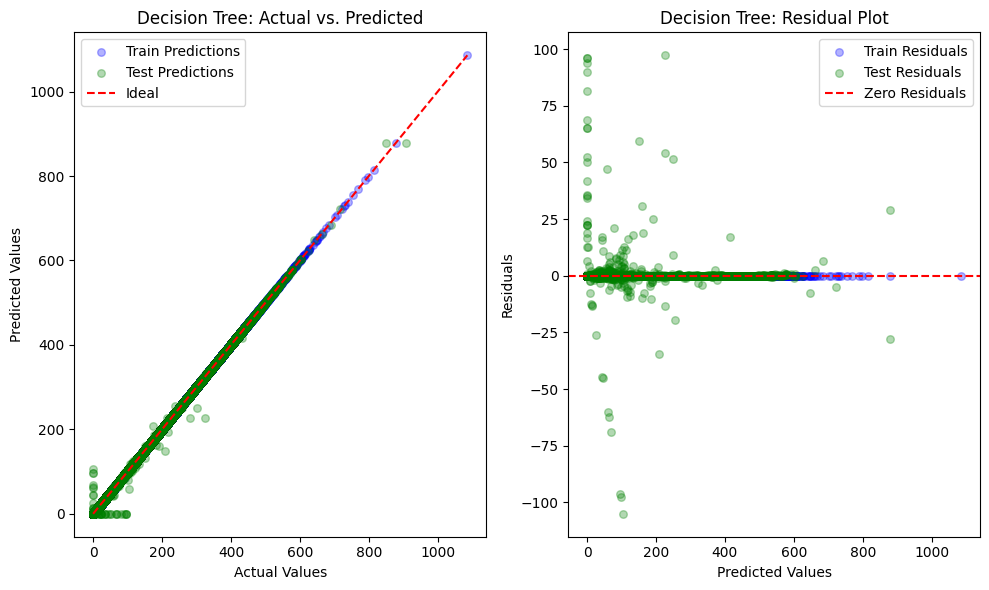

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
train_residuals = Y_train - train_preds
test_residuals = Y_test - test_preds
plt.scatter(Y_train, train_preds, color='blue', alpha=0.3, s=30)
plt.scatter(Y_test, test_preds, color='green', alpha=0.3, s=30)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Decision Tree: Actual vs. Predicted')
plt.legend(['Train Predictions', 'Test Predictions', 'Ideal'])

plt.subplot(1, 2, 2)
plt.scatter(train_preds, train_residuals, color='blue', alpha=0.3, s=30)
plt.scatter(test_preds, test_residuals, color='green', alpha=0.3, s=30)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Decision Tree: Residual Plot')
plt.legend(['Train Residuals', 'Test Residuals','Zero Residuals'])

plt.tight_layout()
plt.show()


#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regr=RandomForestRegressor(max_depth=90,random_state=0,n_estimators=100)
regr.fit(X_train,Y_train)


RandomForestRegressor(max_depth=90, random_state=0)

In [ ]:
train_preds1=regr.predict(X_train)

test_preds1=regr.predict(X_test)

In [ ]:

RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))

print("RMSE TestData = ",str(RMSE_test))

print('RSquared value on test:',regr.score(X_test, Y_test))

RMSE TestData =  1.1892357129057745
RSquared value on test: 0.999884471278108


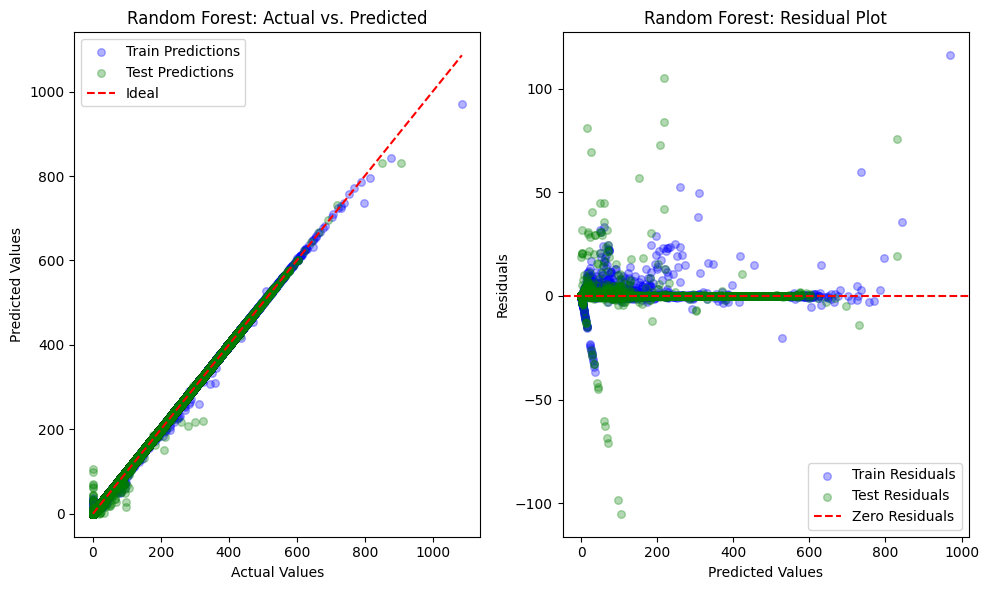

In [ ]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
train_residuals = Y_train - train_preds1
test_residuals = Y_test - test_preds1
plt.scatter(Y_train, train_preds1, color='blue', alpha=0.3, s=30)
plt.scatter(Y_test, test_preds1, color='green', alpha=0.3, s=30)
plt.plot([Y_train.min(), Y_train.max()], [Y_train.min(), Y_train.max()], 'k--', color='red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest: Actual vs. Predicted')
plt.legend(['Train Predictions', 'Test Predictions', 'Ideal'])


plt.subplot(1, 2, 2)
plt.scatter(train_preds1, train_residuals, color='blue', alpha=0.3, s=30)
plt.scatter(test_preds1, test_residuals, color='green', alpha=0.3, s=30)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Random Forest: Residual Plot')
plt.legend(['Train Residuals', 'Test Residuals','Zero Residuals'])

plt.tight_layout()
plt.show()

